# Extended Deep Q-Learning for Multilayer Perceptron for solving Deep Reinforcement Learning Nanodegree - Project 1: Navigation

### 1. Basics

### The Reinforcement Learning Framework:
- reinforcement learning (RL) framework is characterized by an agent learning to interact with its environment
- at each time step, the agent receives the environment's state 
- the agent must choose an appropriate action in response
- at the next time step, the agent receives a reward and a new state
- the agent has the goal to maximize the expected cumulative reward


### Policy:
- we can distinguish between deterministic and stochastic policy
##### Deterministic policy:
- a mapping from state to action
    - $\pi : S \to A$
    - for each state $s \in S$ it yields the action $a \in A$ that the agent will choose while in state $s$
####  Stochastic policy:
- a mapping from state to action probability 
    - $\pi : S \times A \to [0,1]$
    - for each state $s \in S$ it and action $a \in A$ it yields the probability $\pi(a|s)$ that the agent chooses action $a$ while in state $s$

### State-Value Functions:

- state-value function for a policy $\pi$ is denoted $v_\pi$
- $v_\pi = \mathbb{E_\pi}[G_t | S_t = s]$
    - for each state $s \in S$, it yields the expected return if the agent starts in state $s$ and then uses the policy $\pi$ to choose its actions $a$ for all remaining time steps
    - $\mathbb{E_\pi}$ is the expected value of a random variable, given that the agent follows policy $\pi$
    
### Action-Value Functions:

- action-value function for a policy  $\pi$ is denoted $q_\pi$
- $q_\pi(s, a) = \mathbb{E_\pi}[G_t | S_t = s, A_t = a]$
    - for each state $s \in S$ and action $a \in A$ tuple, it yields the expected return if the agent starts in state $s$, takes action $a$, and then follows the policy for all remaining time steps
    - $\mathbb{E_\pi}$ is the expected value of a random variable, given that the agent follows policy $\pi$
    
### Temporal Difference:
- $TD_t(a_t, s_t) = r_t + \gamma max_a(Q(a, s_{t+1})) - Q(a, s_t)$ <p>
$r_t$: reward $r_t$ obtained by playing the action $a_t$ in the state $s_t$<br>
$\gamma$: discount factor(hyperparameter)<br>
$max_a(Q(a, s_{t+1}))$: Q-value of the best action played in the state $s_{t+1}$<br>
$Q(a, s_t)$: Q-value of the action $a_t$ played in the state $s_t$
    
- use the temporal difference $TD_t(a_t, s_t)$ to update $Q(a, s_t)$ 
    - $Q(a, s_t) = Q(a, s_t) + \alpha * TD_t(a_t, s_t) $ 
    - the action value function is updated after every time step

### 2. Deep Q-Learning

![alt text](images/Generalization-of-Q-learning-with-neural-network.png "Q_Learning_Network")
[Image Source](https://www.researchgate.net/profile/Jason_Gu2/publication/251898588/figure/fig1/AS:358420172558336@1462465436051/Generalization-of-Q-learning-with-neural-network.png)

- in deep Q-learning, we use an artificial neural network as q value function
    - the input to the network is the environment states
    - the output of the network is a q-value for all possible actions
    - we can now select the action based on this q-values
        - for example by using an $\epsilon$-greedy policy
    - the network is updated by using the temporal difference method

### 3. Implemented Extensions

### Fixed Q-Targets:
- in vanilla Q-Learning, we are updating a guess for the q values with a guess
- this can potentially lead to harmful correlations
- we can break these correlations by using fixed Q-Targets meaning we are using two separated networks
    - new updaterule: $\Delta w = \alpha * (r_t + \gamma max_a(Q(a, s_{t+1}, w^-)) - Q(a, s_t, w)) \nabla_w Q(a, s_t, w)$
    - $w^-$ are the weights of a separate target network that are not changed during the learning step
        - target Q-Network weights are updated less often(or more slowly) than the Q-Network
        
### Experience Replay:
- deals with the problem that the sequence of experience tuples can be highly correlated
- by learning from this experience tuples in sequential order, we run into the risk of getting swayed by the effects of this correlation
- we can handle this problem by saving the last $m$ transitions
    - $m$ is a large number
    - a transition (or experience) is often defined as a tuple in the form of (state, action, reward, next_state, done)
- the pack of the last transition is called experience replay(or replay buffer)
- from this replay buffer, we take random batches of transitions to make updates to the network
    - this randomness breaks the correlation
    - this also allows us to learn more from individual tuples multiple times

### Reward Clipping:
- deals with the problem that most task has a different reward(score) scale
- this difference makes training unstable
- to avoid these problems, we can clip all positive rewards to a range between -1 and 1
- this technique also reduces the impact of extreme observations
- whether or not reward clipping is helpful depends on the given task

### Gradient Clipping:
- deals with the problem of exploding gradients
    - gradient gets exponentially large from being multiplied by numbers larger than 1
- gradient clipping puts the gradients in a range between a min and max value to avoid this problem

### Double Deep Q-Learning:
- addresses the problem of overestimation of the Q-Values
- the Q-Values depend a lot on what actions have been already tried and what states have been explored
- that means that choosing the right max value can be error-prone especially in the early stages
    - that is because the Q-values are still evolving and we might need more information to figure out the best action
    - we are choosing the max value among a set of noisy numbers which leads to the overestimation
- to solve this problem, we select the best action using one set of parameters $w$ but evaluate it using a different set of parameters $w^-$
    - we can use our already introduced target Q-Network for this
- that means we have two separate function approximators that must agree on the best action
    - if $w$ picks an action that is not the best according to $w^-$ then the estimated Q-Value is not that high
    

### Dueling Networks:

![alt text](images/dueling_dqn.png "Dueling_Q_Learning_Network")
[Image Source](https://coach.nervanasys.com/algorithms/value_optimization/dueling_dqn/index.html)

- the core idea of dueling networks is to use a specialized Dueling Q Head to separate $Q$ to an $A$ (advantage) stream and a $V$ (state value) stream
    - the streams may share some layers at the beginning then branch off with their own fully connected layers
    - this allows the network to differentiate actions from one another better
- the reason for this is that the value of most states do not vary a lot across actions
    - we can start learning the state-value even if only a single action has been taken at this state
- this leads to faster learning, but we still need to capture the difference that actions make in each state
    - the advantage stream realizes this

### 4. Summary

##### 4.1 Learning algorithm:

Step 1: Initialization:
- initialize environment
- initialize agent
    - the agent gets a config file
    - the agent sets up the q-network(architecture described in 1.2 Network Architecture)
    - the agent sets up the q_target-network(same architecture as the q-network)
    - the agent sets up the optimizer(RMSprop)
        - the learning rate is specified in the config file -> ["agent"]["learning_rate"]
        - Note: I choose RMSprop over Adam because Adam started to oscillate close to the end of the training session
    - the agent sets up the criterion(Mean square error loss)
    - the agent initializes the experience replay buffer
        - the buffer size is specified in the config file -> ["agent"]["gamma"]

Step 2: Training:
- if training is set to true the agent will go through a learning session
	- the is training flag is specified in the config file -> config["train"]["run_training"] 

Training Session:
- run n numbers of training epochs
    - one epoch is equal to one episode in the environment(the banana project is an episodic task)
    - an epoch is closed if the environment send the "done" flag
- for each episode:
    - reset the environment and get the initial state
    - while environment does not set the done flag to true -> run learning steps
        - let the agent choose an action based on the given state
            - the agent calculates all q-values for the given state using its q-network
            - based on an "epsilon-greedy action selection" the agent chooses an action
                - we calculate a random number between 0 and 1
                - if the random number is higher then epsilon, then we choose the action with the highest q-value given by the q-network(exploitation) 
                - else we pick a random action(exploration)
        - take that action in the environment
        - get the next_state, reward and done flag as the return from the environment
        - save a tuple of state, action, reward, next_state, done to the agents experience buffer
        - run one learn step
            - check if the learning criteria are fulfilled
                - the buffer includes the minimal amount of memory(at least as much as our batch size)
                - the current step must be a learning step(we only learn every x steps
                    - this leads to more stable learning 
                    - step size is specified in the config file -> ["agent"]["update_rate"] 
                - if learning criteria are not fulfilled, we ignore the current learning step
                - if learning criteria are fulfilled, we run the learning step
            - sample one batch of experiences from the experience buffer
                - batch size is specified in the config file -> ["train"]["batch_size"]
                - the experience buffer returns a random batch of tuples in the form of states, actions, rewards, next_states, dones
            - calculate the loss for the current experience batch
                - use the q-network to calculate the q-values for all states, action pairs in the experience tuple
                    - the result is called q_eval in the code
                - use the q-network to predict the action with the highest q-value for all next_states in the experience tuple
                    - the result is called q_argmax in the code
                - use the q-target-network to calculate the q-values for all next_states, q_argmax pairs
                    - the result is called q_next in the code
                - use the q-target-network output to calculate the q_target values
                    - if done is false -> q_target = reward + gamma * q_next 
                        - gamma is specified in the config file -> ["agent"]["gamma"] 
                    - if done is true -> q_target = reward
                - calculate the loss of the q-network using the agent's criterion function
                    - loss = criterion(q_eval, q_target)
             - update the weights of the q-network based on the calculated loss using the agent's optimizer
             - update the weights of the q-target network using a soft update
                 - make one small step towards the weight values of the q-network weights
                 - the step size is based on tau 
                     - tau is specified in the config file -> ["agent"]["tau"]
                 - this leads to more stable learning 
        - set state to next_state
    - update epsilon value
        - decrease epsilon using the epsilon decay factor until it is equal to epsilon low
	- epsilon decay und epsilon low are specified in the config file -> config["train"]["epsilon_decay"], config["train"]["epsilon_low"]
        - this leads to more exploration at the beginning of the training session and more exploitation towards the end

##### 4.2 Network Architecture
- a dueling Networks architecture is used

![alt text](images/network.png "Network Architecture")
- both q-network and q-target-network are using this architecture

##### 4.3 Hyperparameters and configurations:

["general"]["state_size"] = 37<br>
- state size is the size of the state vector provided by the environment at each timestep<br>
- state size also determines the number of input nodes for the q-network and q-target-network<br>

["general"]["action_size"] = 4<br>
- action size is the number of actions the agent can choose to interact with the environment<br>
- action size also determines the number of output nodes for the q-networkand q-target-network<br>

["general"]["average_score_for_solving"] : 15.0<br>
- average_score_for_solving is the average reward (over 100 episodes) needed to solve the environment<br>
    - Note: the environment is solved with average reward over +13 (over 100 episodes), but I set it to +15 cause my agent shows a good learning curve during testing<br>
    
["train"]["nb_episodes"] = 1800<br>
- max number of episodes during training session<br>
    - the environment should be solved under 1800 episodes<br>
    
["train"]["batch_size"] = 256<br>
- number of states, actions, rewards, next_states, dones tuples sampled from the experience buffer during training<br>

["train"]["epsilon_high"] = 1.0<br>
- initial epsilon value<br>
    - 1.0 means the agent choose first actions randomly(100% exploration)<br>
    
["train"]["epsilon_low"] = 0.01<br>
- the lowest value epsilon can become<br>
    - 0.01 means we want the agent to exploit his knowledge most of the time, but we also have a minimal change of exploration during later episodes<br>
    
["train"]["epsilon_decay"] = 0.995<br>
- the rate in which epsilon decrease from epsilon_high to epsilon_low at each episode<br>
    - we want this value to be close to 1 to get a slow but constant decrease<br>
    
["agent"]["learning_rate"] = 0.001<br>
- the rate in which the agent learns(how big are the weight update steps)<br>
    - huge values lead to fast learning but will probably overshoot the optimum<br>
    - small values might lead to very slow learning <br>
    - I choose 0.001 cause higher values led to oscillation of the received reward<br>
    
["agent"]["gamma"] = 0.99<br>
- is a decay factor for future rewards meaning received rewards currently should have more value than uncertain future rewards<br>
- this value should be close to 1 cause we only took one step into the future into acount<br>

["agent"]["tau"] = 0.001<br>
- this value determines the step size of the soft q-network to q-target network weight update<br>
- the value should be close to one to get a more stable learning process<br>

["agent"]["update_rate"] = 4<br>
- the frequenz in wich a learning step is done<br>
- a value of 4 means we run one update step every 4 episodes<br>

["buffer"]["size"] = 100000<br>
- the number of experience tuples we can save to our experience replay buffer<br>
- this value should be high to save as much experience as possible<br>

["model"]["fc1_nodes"] = 256<br>
- the number of nodes for the first fully connected layer<br>
- 256 is choosen cause it led to the fastest learning curve while still obtained a smooth learning curve<br>

["model"]["fc2_adv"] = 256<br>
- the number of nodes for the advantage stream of the dueling Network<br>
- 256 is choosen cause it led to the fastest learning curve while still obtained a smooth learning curve<br>

["model"]["fc2_val"] = 256<br>
- the number of nodes for the state value stream of the Dueling Network<br>
- 256 is chosen cause it led to the fastest learning curve while still obtained a smooth learning curve

### 5. Project Code 

In [1]:
import json
import os
import helper
import sessions
from dqn_agent import Agent
from unityagents import UnityEnvironment

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: 0.94
Episode 200	Average Score: 1.83
Episode 300	Average Score: 3.87
Episode 400	Average Score: 5.82
Episode 500	Average Score: 8.14
Episode 600	Average Score: 9.22
Episode 700	Average Score: 9.973
Episode 800	Average Score: 11.02
Episode 900	Average Score: 11.72
Episode 1000	Average Score: 12.61
Episode 1100	Average Score: 13.27
Episode 1200	Average Score: 13.32
Episode 1300	Average Score: 14.10
Episode 1400	Average Score: 14.05
Episode 1500	Average Score: 14.43
Episode 1540	Average Score: 15.06
Environment solved in 1440 episodes!	Average Score: 15.06


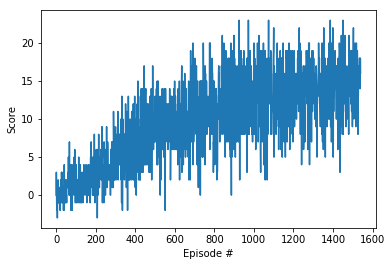

In [2]:
with open(os.path.join(".", "configs", "Extended_Dqn_Banana_config.json"), "r") as read_file:
    config = json.load(read_file)

env = UnityEnvironment(file_name=os.path.join(*config["general"]["env_path"]))
agent = Agent(config=config)

if config["train"]["run_training"]:
    scores = sessions.train(agent, env, config)
    helper.plot_scores(scores)
    agent.save()
else:
    agent.load()
    sessions.test(agent, env)
    
env.close()

### 6. Ideas for Future Work

##### 1. Training Time: 
- add Prioritized Experience Replay to minimize the total training time

##### 2. Stability:
- the agent sometimes starts oscillating between two actions
    - this problem might be solvable by introducing some noise
